# Homework Draft: Cal EnviroScreen

---

In this homework, students will gain experience with fundamental Exploratory Data Analysis using the CalEnviroScreen data. This homework will build on methods introduced in lab. It will also serve as an application of data science in the field of social sciences and **environmental justice**. According to state law, environmental justice refers to the "fair treatment of people of all races, cultures, and incomes with respect to the development, adoption, implementation and enforcement of environmental laws, regulations, and policies." 

By the end of this homework, students will be able to:
- Perform basic tabular analysis and interpret results
- Visualize and analyze CalEnviroScreen data
- Identify how data-driven decision making can guide policy and resource allocation

## Table of Contents

1. [Introduction](#introduction)
2. [A Closer Look at Census Tracts and Regional Data](#a-closer-look-at-census-tracts-and-regional-data)
3. [Visualizing the Data](#visualizing-the-data)
4. [Data-Driven Decision Making](#data-driven-decision-making)

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import seaborn as sns

---

## Introduction


The [California Communities Environmental Health Screening Tool](https://oehha.ca.gov/calenviroscreen) (CalEnviroScreen) provides accessible demographic and environmental information to identify communities that are susceptible to certain types of pollution. This tool utilizes environmental, health, and socioeconomic information to produce scores for every census tract in California, allowing us to compare qualities of different communities. 

### An Initial Glance at the Data

[TODO]
- explain merge
- .columns
- .info()
- checking variable types (looking at nans)

To begin exploring CalEnviroScreen, run the following cell to read in the data.

In [2]:
# Read in the data

enviro = pd.read_csv('enviro.csv')
enviro.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95


Let's also read in data containing information about the locations of community colleges in California. We will merge these two datasets to analyze the socioeconomic conditions of various community colleges in California using the `.merge()` function in pandas. 

In [3]:
# Read in the data

collegecodes= pd.read_excel("College_codes_EVDtype.xlsx")
collegecodes.head()

,OPEID,College,City,State,Zip,yrs,EVDCode
0,111100,ALLAN HANCOCK COLLEGE,SANTA MARIA,CA,93454,2,1
1,111300,ANTELOPE VALLEY COLLEGE,LANCASTER,CA,93534,2,1
2,111500,ARMSTRONG UNIVERSITY,BERKELEY,CA,94704,4,4
3,111600,ART CENTER COLLEGE OF DES,PASADENA,CA,91103,4,4
4,111700,AZUSA PACIFIC UNIVERSITY,AZUSA,CA,91702,4,4


Let's merge these two datasets.

In [4]:
# Merge enviro and collegecodes

collegecodes_public = collegecodes[collegecodes['EVDCode'] != 4]
enviro_cc = pd.merge(enviro, collegecodes_public, how='inner', left_on='ZIP', right_on='Zip')
enviro_cc.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,OPEID,College,City,State,Zip,yrs,EVDCode
0,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,99.94,95-100% (highest scores),...,83.37,8.65,95.46,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1
1,6037542200,7155,Los Angeles,90221,Compton,-118.197151,33.886893,73.92,99.57,95-100% (highest scores),...,84.83,8.80,96.52,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1
2,6037542401,4735,Los Angeles,90221,Compton,-118.210904,33.892362,73.16,99.48,95-100% (highest scores),...,88.46,9.18,98.68,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1
3,6037541604,5917,Los Angeles,90221,Compton,-118.211896,33.907866,65.81,98.05,95-100% (highest scores),...,83.08,8.62,95.32,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1
4,6037542106,3523,Los Angeles,90221,East Rancho Dominguez,-118.189077,33.893404,65.67,98.00,95-100% (highest scores),...,85.51,8.87,96.97,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1


Now, let's familiarize ourselves with the data before performing any manipulations. 

**Question 1:** What are the dimensions of the `enviro` dataset? Fill in the code cell with the necessary code and print your answer.

In [43]:
# TODO: Fill in the ellipses

shape = ... 
print(shape)

Ellipsis


**Question:** What are the columns of the dataset?

In [ ]:
# TODO: Write code to print the columns of the enviro dataset

print(...)

**Question 2:** What is the granularity of the enviro dataset? What does each row represent? What about the collegecodes dataset?

*YOUR ANSWER HERE...*

**Question 3:** Describe the `Pollution_Burden_Pctl` category in the enviro dataset and what it represents by navigating the to the [CalEnviroScreen](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40) website **in your own words**. What is the difference between a high score and a low score? 

*YOUR ANSWER HERE...*

---

## A Closer Look At Census Tracts and Regional Data

[TODO:]
- include slicing (.loc, .iloc)
- summary statistics 
- explain .merge()

**Question 4:** Find the most polluted zip codes and show the college there using the code cell below.

In [44]:
# TODO: Write code to find the most polluted zip codes and display the colleges

enviro_cc.sort_values(by='CES 4.0 Score', ascending=False).head(10)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,OPEID,College,City,State,Zip,yrs,EVDCode
0,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,80.71,99.94,95-100% (highest scores),...,83.37,8.65,95.46,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1
11,6099003700,4669,Stanislaus,95380,Unincorporated Stanislaus County area,-120.883606,37.464793,75.31,99.70,95-100% (highest scores),...,81.37,8.44,93.87,115700,CALIF ST UNIV STANISLAUS,TURLOCK,CA,95380,4,2
1,6037542200,7155,Los Angeles,90221,Compton,-118.197151,33.886893,73.92,99.57,95-100% (highest scores),...,84.83,8.80,96.52,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1
2,6037542401,4735,Los Angeles,90221,Compton,-118.210904,33.892362,73.16,99.48,95-100% (highest scores),...,88.46,9.18,98.68,118800,COMPTON CMTY COLLEGE,COMPTON,CA,90221,2,1
19,6037294701,3099,Los Angeles,90744,Los Angeles,-118.254908,33.778016,71.29,99.27,95-100% (highest scores),...,81.46,8.45,93.99,122400,LOS ANGELES HARBOR COLLEG,WILMINGTON,CA,90744,2,1
12,6099003802,5339,Stanislaus,95380,Turlock,-120.857699,37.486126,66.71,98.35,95-100% (highest scores),...,80.89,8.39,93.38,115700,CALIF ST UNIV STANISLAUS,TURLOCK,CA,95380,4,2
34,6071004900,7113,San Bernardino,92410,San Bernardino,-117.316879,34.100314,66.66,98.31,95-100% (highest scores),...,91.41,9.48,99.43,127200,SAN BERNARDINO VALLEY COL,SN BERNRDNO,CA,92410,2,1
43,6047001302,2873,Merced,95340,Merced,-120.478191,37.304035,66.50,98.25,95-100% (highest scores),...,96.40,10.00,100.00,123700,MERCED COLLEGE,MERCED,CA,95340,2,1
44,6047001301,2662,Merced,95340,Merced,-120.491786,37.307192,66.41,98.21,95-100% (highest scores),...,87.78,9.11,98.32,123700,MERCED COLLEGE,MERCED,CA,95340,2,1
48,6019006802,3339,Fresno,93654,Unincorporated Fresno County area,-119.497435,36.599505,66.35,98.17,95-100% (highest scores),...,90.41,9.38,99.26,130800,REEDLEY COLLEGE,REEDLEY,CA,93654,2,1


**Question 5:** Find the least polluted zip codes and show the college there using the code cell below.

In [45]:
# TODO: Write code to find the least polluted zip codes and display the colleges

enviro_cc.sort_values(by='CES 4.0 Score', ascending=True).head(10)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl,OPEID,College,City,State,Zip,yrs,EVDCode
157,6099001002,3284,Stanislaus,95350,Modesto,-120.978323,37.654742,26.51,52.02,50-55%,...,46.76,4.85,45.37,124000,MODESTO JR COLLEGE,MODESTO,CA,95350,2,1
90,6071010802,3820,San Bernardino,92407,Unincorporated San Bernardino County area,-117.352081,34.270082,26.77,52.58,50-55%,...,47.01,4.88,45.79,114200,CALIF ST UNIV SAN BERNARD,SN BERNRDNO,CA,92407,4,2
18,6099003908,2428,Stanislaus,95380,Turlock,-120.854306,37.506439,29.72,58.16,55-60%,...,59.88,6.21,65.48,115700,CALIF ST UNIV STANISLAUS,TURLOCK,CA,95380,4,2
122,6037554600,4173,Los Angeles,90650,Norwalk,-118.089292,33.883645,31.87,62.14,60-65%,...,49.56,5.14,49.61,116100,CERRITOS COLLEGE,NORWALK,CA,90650,2,1
156,6099000909,5437,Stanislaus,95350,Modesto,-120.984276,37.673238,32.39,63.17,60-65%,...,55.92,5.80,59.38,124000,MODESTO JR COLLEGE,MODESTO,CA,95350,2,1
54,6019006300,7507,Fresno,93654,Unincorporated Fresno County area,-119.435827,36.663503,33.05,64.12,60-65%,...,48.05,4.98,47.44,130800,REEDLEY COLLEGE,REEDLEY,CA,93654,2,1
203,6073005200,7087,San Diego,92101,San Diego,-117.152110,32.715528,33.15,64.33,60-65%,...,48.92,5.07,48.70,127300,SAN DIEGO CITY COLLEGE,SAN DIEGO,CA,92101,2,1
155,6099000805,6582,Stanislaus,95350,Modesto,-121.021662,37.676408,33.21,64.44,60-65%,...,65.51,6.80,73.76,124000,MODESTO JR COLLEGE,MODESTO,CA,95350,2,1
42,6071004403,5054,San Bernardino,92410,San Bernardino,-117.340961,34.092831,33.44,64.88,60-65%,...,66.03,6.85,74.46,127200,SAN BERNARDINO VALLEY COL,SN BERNRDNO,CA,92410,2,1
184,6013364002,5531,Contra Costa,94806,Tara Hills,-122.317385,37.993894,33.52,65.03,65-70%,...,61.24,6.35,67.52,119000,CONTRA COSTA COLLEGE,SAN PABLO,CA,94806,2,1


Now that we have become more familiar with the data, let's take a closer look at the census tract for El Camino College. The relevant tract number is **6037603702**.

**Question 6:** Filter the dataset for this tract number using the code cell below.

In [47]:
# TODO: Fill in the ellipses

ecc = enviro[...]
ecc

**Question 7:** Based on this filtered data, let's examine three new measures of environmental health and interpret the scores for El Camino College. Before writing any code let's establish what these measures are. Refer back to the CalEnviroScreen website for context on these three health measures in the data and write definitions for each. 

- `PM2.5 Pctl`: *YOUR ANSWER HERE...*
- `asthma_pctl`: *YOUR ANSWER HERE...*
- `CES 4.0 Percentile`: *YOUR ANSWER HERE...*

Now, write code in the cell below to obtain the values for these metrics, as well as `Pollution Burden Pctl`, for the **El Camino College** census tract. 

In [ ]:
# TODO: Fill in the ellipses

pm25_pctl = ...
asthma_pctl = ...
ces4_pctl = ...
plltn_burden_pctl = ...

Briefly describe the real-world implications of at least two of these scores.

*YOUR ANSWER HERE...*

Let's compare these four measures across other census tracts in **Los Angeles**. 

**Question 8:** Write code to filter the enviro_cc dataset to contain only Los Angeles county data. Additionally, make sure only the following columns are included in this new dataset: `Approximate Location`, `PM2.5 Pctl`, ` CES 4.0 Percentile`, `Asthma Pctl`, and `Pollution Burden Pctl`.

Use specific column name

In [ ]:
# TODO: Filter for Los Angeles data

la = ...
la.head()

TODO: Give a demo of groupby....include different agg functions...group by county find max PM2.5 for ex

**Question 9:** With this new dataset, find the mean value for each of these four metrics based on the unique `Approximate Location`. Assign this new dataset to a new DataFrame. 

*Hint: you might find the `.grouby()` method useful*

In [ ]:
# TODO: Write code to find the mean of PM2.5, CES4.0, Asthma, and Pollution Burden percentiles by approximate location

city_means = ...

---

## Visualizing the Data

[TODO:] 
- Add histograms looking at distributions of diff pollution measures
- Add seaborn pairplots after assessing heatmap 
- Violinplot of multiple features side by side to compare distributions of multiple variables

CalEnviroScreen is also a mapping tool that allows us to visualize the socioeconomic disparities across California. We will be using a package called `geopandas` to facilitate this mapping. 

The following code cell reads in a shape file (.shp) and contains information that will allow us to map the data using geopandas. A shapefile is a popular geospatial vector data format that stores the geometry of the features in our data. They are common for handling geospatial data. Simply run the cell below to read in the shapefile associated with CalEnviroScreen.

In [48]:
# Provide the path to your GIS file (e.g., .shp file)
file_path = 'calenviroscreen40shpf2021shp/CES4 Final Shapefile.shp'

# Load the shapefile
gdf = gpd.read_file(file_path)

# Display the first few rows of the GeoDataFrame
gdf.head()

,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
0,6.083002e+09,93454,Santa Barbara,Santa Maria,4495,36.019653,69.162885,0.034190,10.566273,7.567724,...,12.5028,68.9210,20.8899,0.4004,0.2670,1.3126,6999.357689,2.847611e+06,8.2091,"POLYGON ((-39795.07 -341919.191, -38126.384 -3..."
1,6.083002e+09,93455,Santa Barbara,Santa Maria,13173,37.030667,70.637922,0.035217,11.561917,7.624775,...,5.3519,78.6229,13.2240,2.5051,0.0000,0.9489,19100.578232,1.635292e+07,4.6990,"POLYGON ((-39795.07 -341919.191, -39803.632 -3..."
2,6.083002e+09,93454,Santa Barbara,Santa Maria,2398,31.213140,61.069087,0.034190,10.566273,7.548835,...,12.8857,65.7214,30.6088,0.9591,0.0000,2.1685,4970.985897,1.352329e+06,0.5421,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,93455,Santa Barbara,Orcutt,4496,6.639331,5.988401,0.036244,13.615432,7.660570,...,14.4128,22.9537,69.1948,0.9342,0.7117,2.5356,6558.956012,2.417717e+06,3.6699,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,93455,Santa Barbara,Orcutt,4008,14.022852,23.121533,0.036244,13.615432,7.663210,...,18.8872,33.4082,59.7804,0.6986,1.4721,1.3723,6570.368730,2.608422e+06,3.2685,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


We can call `.plot()` to map the data.

<Axes: >

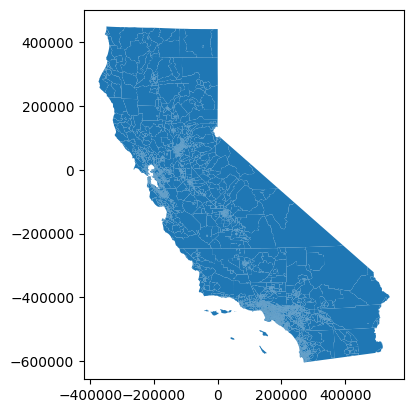

In [49]:
# map the data
gdf.plot()

**Question:** Like we did with the enviro data, let's merge the gdf data with collegecodes_public. Following the format from before, merge the necessary datasets on zipcode. 

In [54]:
# TODO: Fill in the ellipses

enviro_cc_shp = pd.merge(..., ..., how=..., left_on=..., right_on=...)
enviro_cc_shp.head()

We can use geopandas to visualize the spread of our metrics, like `Pollution Burden`. Run the following code cell below. The left plot displays the spread of pollution burden score across California and the right plot displays the spread of poverty across California.  

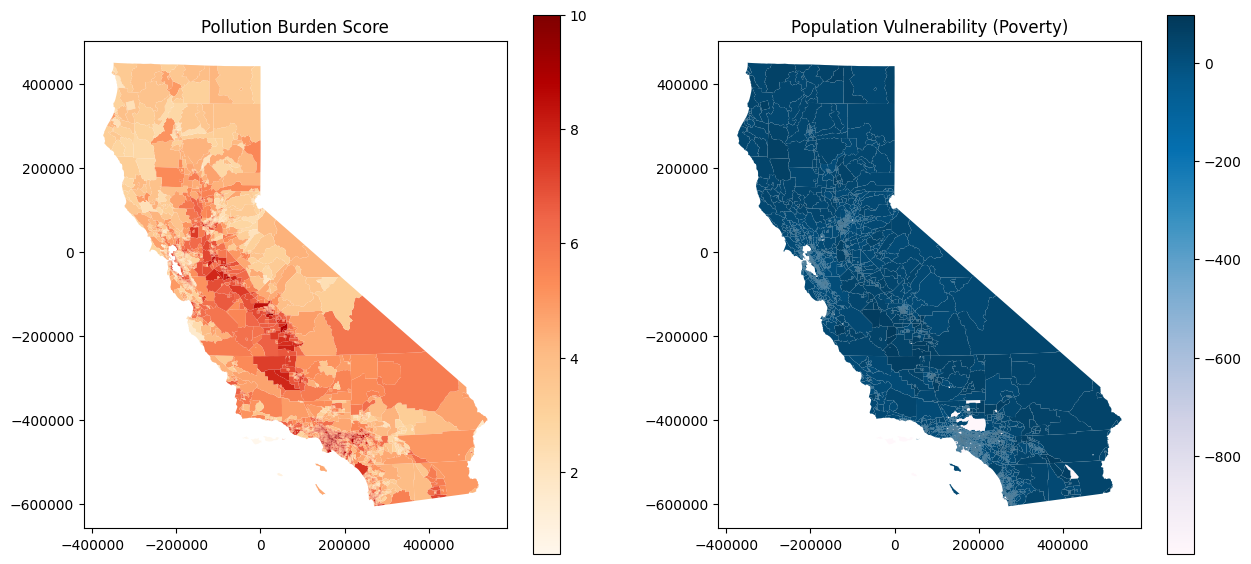

In [51]:
# Create a figure with subplots to compare pollution burden and population vulnerability
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot Pollution Burden on the left
gdf.plot(column='PolBurdSc', ax=ax[0], legend=True, cmap='OrRd')
ax[0].set_title('Pollution Burden Score')

# Plot Population Vulnerability on the right (example with 'Poverty' column)
gdf.plot(column='Poverty', ax=ax[1], legend=True, cmap='PuBu')
ax[1].set_title('Population Vulnerability (Poverty)')

plt.show()

**Question:** List an observation from each plot and how it relates to environmental justice.  

*YOUR ANSWER HERE...*

We can also draw some simple, but powerful analyses by observing the correlation between variables in our data. The code cell below computes the correlation coefficient between various socioeconomic variables in our data and plots a **heatmap** of these coefficients. A heatmap is a visualization that represents the magnitude of values using color. It allows us to easily observe the magnitudes of correlation across pairs of variables.

Run the code cell below and interpret the heatmap.

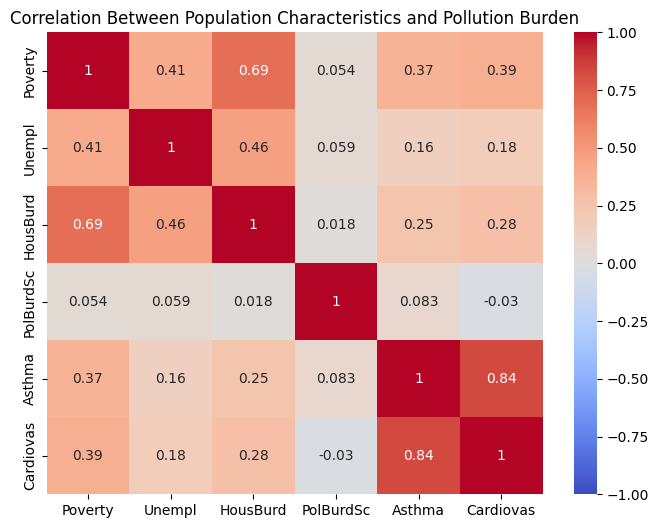

In [53]:
# Select columns for correlation matrix
corr_columns = ['Poverty', 'Unempl', 'HousBurd', 'PolBurdSc', 'Asthma', 'Cardiovas']

# Create a correlation matrix
corr_matrix = gdf[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Population Characteristics and Pollution Burden')
plt.show()

**Question:** Which variables are strongly correlated with each other, in either the positive or negative direction? Why might these variables be strongly correlated with one another?

*YOUR ANSWER HERE...*

---

## Data-driven Decision Making

Throughout this notebook, you gained valuable information about how to manipulate data to draw powerful analyses about socioeconomic disparaties across Los Angeles and California. Tools like CalEnviroScreen are essential for evaluating environmnetal justice because they help identify and prioritize communities that face higher environmnetal and health risks due to disproportionate effects of pollution. 

[TODO:] tie this in with an article related to CalEnviroScreen data...

**Question:** Can you think of how an analysis of two other variables in the data not used in this notebook may be helpful for identifying marginalized communities? You may use the optional code cell as scratch work.

*YOUR ANSWER HERE...*

In [ ]:
# Optional code cell for scratch work

**Question:** In 3-4 sentences, how might access to CalEnviroScreen data help guide resource allocation and inform policymaking?

*YOUR ANSWER HERE...*

---

# Congratulations, you are finished with the notebook!